In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from matplotlib import pyplot as plt
from matplotlib import cm
import os
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
#Set step, paths, pfts and run all
#STEP = 1
STEP = 'NPP_VegC_VegN_PFT'
CMT='black-spruce'
#CMT ='birch'
#STEP = 4

#STEP1_results = '/data/workflows/BONA-Birch-STEP1-SA/results.csv'
#STEP1_sample_matrix = '/data/workflows/BONA-Birch-STEP1-SA/sample_matrix.csv'

STEP1_results = '/data/workflows/BONA-BS-STEP1-SA/results.csv'
STEP1_sample_matrix = '/data/workflows/BONA-BS-STEP1-SA/sample_matrix.csv'

#NPP_VegC_PFT_results = '/data/workflows/BONA-Birch-NPP-VegC-PFT-SA/results.csv'
#NPP_VegC_PFT_sample_matrix = '/data/workflows/BONA-Birch-NPP-VegC-PFT-SA/sample_matrix.csv'

NPP_VegC_PFT_results = '/data/workflows/BONA-BS-NPP-VegC-PFT-SA/results.csv'
NPP_VegC_PFT_sample_matrix = '/data/workflows/BONA-BS-NPP-VegC-PFT-SA/sample_matrix.csv'


#STEP4_results = '/data/workflows/BONA-Birch-STEP4-SA/results.csv'
#STEP4_sample_matrix = '/data/workflows/BONA-Birch-STEP4-SA/sample_matrix.csv'

STEP4_results = '/data/workflows/BONA-BS-STEP4-SA/results.csv'
STEP4_sample_matrix = '/data/workflows/BONA-BS-STEP4-SA/sample_matrix.csv'

pfts=['White Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen']

In [3]:
#if number of pfts != 5 you will have to adjust these values

if STEP == 1:
    target_vars = ['GPP1', 'GPP2', 'GPP3', 'GPP4', 'GPP5']
    
    calib_params = [['cmax', 'cmax.1', 'cmax.2', 'cmax.3', 'cmax.4']] # here for reference
    
    vars_nopft= ['GPP']
    
if STEP == 'NPP_VegC_PFT' and CMT=='birch':
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
                   'VegCarbonLeaf4', 
                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5']
    
    calib_params = [['nmax'], ['krb(0)'], ['krb(1)'], ['krb(2)'],
                   ['cfall(0)'], ['cfall(1)'], ['cfall(2)'],
                   ['nfall(0)'], ['nfall(1)'], ['nfall(2)']] # here for reference
    calib_params_flat = ['nmax', 'krb(0)', 'krb(1)', 'krb(2)',
                   'cfall(0)', 'cfall(1)', 'cfall(2)',
                    'nfall(0)', 'nfall(1)', 'nfall(2)']
    vars_nopft= ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
if STEP == 'NPP_VegC_VegN_PFT' and CMT=='birch':
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
                   'VegCarbonLeaf4', 
                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 
                   'VegNitrogenLeaf2', 'VegNitrogenStem2', 'VegNitrogenRoot2',
                   'VegNitrogenLeaf3', 'VegNitrogenStem3', 'VegNitrogenRoot3',
                   'VegNitrogenLeaf4', 
                   'VegNitrogenLeaf5', 'VegNitrogenStem5', 'VegNitrogenRoot5']
    
    calib_params = [['nmax'], ['krb(0)'], ['krb(1)'], ['krb(2)'],
                   ['cfall(0)'], ['cfall(1)'], ['cfall(2)'],
                   ['nfall(0)'], ['nfall(1)'], ['nfall(2)']] # here for reference
    calib_params_flat = ['nmax', 'krb(0)', 'krb(1)', 'krb(2)',
                   'cfall(0)', 'cfall(1)', 'cfall(2)',
                    'nfall(0)', 'nfall(1)', 'nfall(2)']
    vars_nopft= ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 
                 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 'NPP_VegC_VegN_PFT' and CMT=='black-spruce':
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
                   'VegCarbonLeaf4', 
                   'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 
                   'VegNitrogenLeaf2', 'VegNitrogenStem2', 'VegNitrogenRoot2',
                   'VegNitrogenLeaf3', 'VegNitrogenStem3', 'VegNitrogenRoot3',
                   'VegNitrogenLeaf4', 
                   'VegNitrogenLeaf5']
    
    calib_params = [['nmax'], ['krb(0)'], ['krb(1)'], ['krb(2)'],
                   ['cfall(0)'], ['cfall(1)'], ['cfall(2)'],
                   ['nfall(0)'], ['nfall(1)'], ['nfall(2)']] # here for reference
    calib_params_flat = ['nmax', 'krb(0)', 'krb(1)', 'krb(2)',
                   'cfall(0)', 'cfall(1)', 'cfall(2)',
                    'nfall(0)', 'nfall(1)', 'nfall(2)']
    vars_nopft= ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 
                 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 2:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5']
    
    calib_params = [# here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1','krb(1).2','krb(1).4'],
                    ['krb(2)','krb(2).1','krb(2).2','krb(2).4']]
    
    vars_nopft  = ['NPPAll']
    
#if STEP == 2:
#    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
#                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
#                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
#                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
#                   'VegCarbonLeaf4', 
#                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5']
    
#    calib_params = [['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
#                    ['krb(1)','krb(1).1','krb(1).2','krb(1).4'],
#                    ['krb(2)','krb(2).1','krb(2).2','krb(2).4'],
#                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
#                    ['cfall(1)','cfall(1).1','cfall(1).2','cfall(1).4'],
#                    ['cfall(2)','cfall(2).1','cfall(2).2','cfall(2).4']]
    
#    calib_params_flat = ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4',
#                    'krb(1)','krb(1).1','krb(1).2','krb(1).3',
#                    'krb(2)','krb(2).1','krb(2).2','krb(2).3',
#                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
#                    'cfall(1)','cfall(1).1','cfall(1).2','cfall(1).3',
#                    'cfall(2)','cfall(2).1','cfall(2).2','cfall(2).3']
    
#    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
#if STEP == 2:
#    target_vars = ['VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
#                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
#                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
#                   'VegCarbonLeaf4', 
#                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5',
#                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 
#                   'VegNitrogenLeaf2', 'VegNitrogenStem2', 'VegNitrogenRoot2',
#                   'VegNitrogenLeaf3', 'VegNitrogenStem3', 'VegNitrogenRoot3',
#                   'VegNitrogenLeaf4', 
#                   'VegNitrogenLeaf5', 'VegNitrogenStem5', 'VegNitrogenRoot5']
    
#    calib_params = [['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
#                    ['cfall(1)','cfall(1).1','cfall(1).2','cfall(1).4'],
#                    ['cfall(2)','cfall(2).1','cfall(2).2','cfall(2).4'],
#                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
#                    ['nfall(1)','nfall(1).1','nfall(1).2','nfall(1).4'],
#                    ['nfall(2)','nfall(2).1','nfall(2).2','nfall(2).4']]
    
#    calib_params_flat = ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
#                    'cfall(1)','cfall(1).1','cfall(1).2','cfall(1).3',
#                    'cfall(2)','cfall(2).1','cfall(2).2','cfall(2).3',
#                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
#                    'nfall(1)','nfall(1).1','nfall(1).2','nfall(1).3',
#                    'nfall(2)','nfall(2).1','nfall(2).2','nfall(2).3']
    
#    vars_nopft  = ['VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 
#                   'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
#if STEP == 2:
#    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
#                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
#                   'VegCarbonStem1', 'VegCarbonRoot3', 'VegCarbonLeaf4',
#                   'VegCarbonRoot4', 'VegCarbonLeaf5']
#    
#    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
#                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
#                    ['krb(1)','krb(1).1'],
#                    ['krb(2)','krb(2).1','krb(2).2']]
#    
#    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
if STEP == 3:
    target_vars = [
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=[
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','sudocfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']
    
if STEP == 3:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1'],
                    ['krb(2)','krb(2).1','krb(2).2'],
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4', # here for reference
                    'krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4',
                    'krb(1)','krb(1).1',
                    'krb(2)','krb(2).1','krb(2).2',
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','cfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']
    
    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 4:
    target_vars = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']
    
    calib_params = [['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']] # here for reference
    calib_params_flat = ['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
    vars_nopft= ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']


In [4]:
def Filter(string_list, substr):
    """ filters list of strings for items containing substring """
    return [str for str in string_list if
             any(sub in str for sub in substr)]

In [5]:
def calc_rmse(x,y):
    """ Return rmse where x and y are array-like """
    return ((x-y) ** 2).mean() ** .5

In [6]:
def calc_overall_accuracy(results, sample_matrix, target_vars, vars_nopft):
    
    results = pd.read_csv(results, names=target_vars)
    #print(results)
    # extract targets from last row of results csv
    targets = results.iloc[int(len(results)-1)] 
    results = results.iloc[0:len(results)-1]
    
    r2s = []
    rmses=[]
    
    #calculate r2s and rmse for individual variables 
    for index, row in results.iterrows():
        
        tgt_r2s = []
        tgt_rmses = []
        
        for var_nopft in vars_nopft:
            
            results_vars_cols = Filter(results, [var_nopft])
            if row[results_vars_cols].isna().values.any():
                tgt_r2s.append(0)
                tgt_rmses.append(10000000)
                continue
            tgt_r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
            tgt_rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))  
            
        #r2s.append(tgt_r2s)
        #rmses.append(tgt_rmses)
        r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
        rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))

    # concatenate sample matrix to results
    sample_matrix = pd.read_csv(sample_matrix)
    results[sample_matrix.columns] = sample_matrix
    r2s=np.array(r2s)
    rmses=np.array(rmses)
    results['r2']= r2s
    results['rmse']= rmses
    #iterate over target variables (no pft or compartment)
    #for idx, name in enumerate(vars_nopft):
        
        #set r2 and rmse columns
    #    results[name + '_r2_raw'] = r2s[:, idx]
    #    results[name + '_rmse_raw'] = rmses[:, idx]
        
    #    #scale rmse between min and max
    #    results[name + '_rmse_scaled'] = (results[name + '_rmse_raw']-np.nanmin(results[name + '_rmse_raw']))/(np.max(results[name + '_rmse_raw'])-np.nanmin(results[name + '_rmse_raw']))
        
    #    #subrtact scaled rmse from r2 for overall accuracy term
    #    results[name + '_accuracy'] = (results[name + '_r2_raw']-results[name+'_rmse_scaled'])
    
    #scale r2 and rmse and combine for overall accuracy term
    results['rmse_scaled'] = (results['rmse']-np.nanmin(results['rmse']))/(np.max(results['rmse'])-np.nanmin(results['rmse']))
    results['overall_accuracy'] = (results['r2']-results['rmse_scaled'])
    results['mean_rmse'] = results[Filter(list(results.columns), ['rmse'])].mean(axis=1)
    results['mean_r2'] = results[Filter(list(results.columns), ['r2'])].mean(axis=1)
    
    return results, targets

In [7]:
if STEP == 1:
    results, targets = calc_overall_accuracy(STEP1_results, STEP1_sample_matrix, target_vars, vars_nopft)
    
if STEP == 'NPP_VegC_PFT':
    results, targets = calc_overall_accuracy(NPP_VegC_PFT_results, NPP_VegC_PFT_sample_matrix, target_vars, vars_nopft)
    
if STEP == 'NPP_VegC_VegN_PFT':
    results, targets = calc_overall_accuracy(NPP_VegC_PFT_results, NPP_VegC_PFT_sample_matrix, target_vars, vars_nopft)
    
if STEP == 2:
    results, targets = calc_overall_accuracy(STEP2_results, STEP2_sample_matrix, target_vars, vars_nopft)
    
if STEP == 3:
    results, targets = calc_overall_accuracy(STEP3_results, STEP3_sample_matrix, target_vars, vars_nopft)

if STEP == 4:
    results, targets = calc_overall_accuracy(STEP4_results, STEP4_sample_matrix, target_vars, vars_nopft)

print('{} runs'.format(len(results)))


100 runs


In [8]:
results

,NPPAll1,NPPAll2,NPPAll3,NPPAll4,NPPAll5,VegCarbonLeaf1,VegCarbonStem1,VegCarbonRoot1,VegCarbonLeaf2,VegCarbonStem2,...,cfall(2),nfall(0),nfall(1),nfall(2),r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
0,256.232500,39.390634,16.362036,368.371865,42.142809,316.866647,1.405864,0.018512,127.064671,203.887259,...,0.003769,0.000864,0.000325,0.000540,-0.734563,5.072380,0.999956,-1.734519,3.036168,-0.734563
1,203.875885,39.374198,17.989123,368.883896,42.228367,275.612668,0.270585,5.889436,127.026125,206.251437,...,0.001722,0.000611,0.000924,0.000131,-0.676876,4.987320,0.982251,-1.659127,2.984785,-0.676876
2,269.936866,38.450713,16.928832,368.327031,42.157960,296.844180,2.544548,0.001187,121.956718,206.587720,...,0.004448,0.000860,0.000387,0.000846,-0.734548,5.072359,0.999951,-1.734500,3.036155,-0.734548
3,215.365332,38.031632,20.208990,368.005323,42.061857,507.862457,1937.900708,447.783200,127.327016,191.734587,...,0.002359,0.000752,0.000159,0.000384,0.995151,0.268188,0.000000,0.995151,0.134094,0.995151
4,236.960130,38.947330,17.912809,368.400892,42.177522,272.106906,6.608961,1.853631,127.198183,198.957465,...,0.001932,0.000122,0.000883,0.000119,-0.699126,5.020298,0.989115,-1.688241,3.004707,-0.699126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,273.294477,38.396621,17.245866,368.183619,42.142044,288.653708,0.987861,0.029168,123.711076,202.929262,...,0.003570,0.000479,0.000673,0.000807,-0.733808,5.071276,0.999726,-1.733534,3.035501,-0.733808
96,249.913860,38.344236,20.483349,368.262847,42.115665,375.655237,255.217657,86.513548,127.089072,194.970074,...,0.001738,0.000426,0.000401,0.000124,-0.064106,3.972914,0.771110,-0.835216,2.372012,-0.064106
97,192.301973,39.815453,17.397735,369.296301,42.225483,395.668588,376.793048,112.990747,130.542987,203.931941,...,0.002037,0.000487,0.000885,0.000858,0.121467,3.609906,0.695553,-0.574086,2.152729,0.121467
98,172.335365,39.575906,19.500143,369.482925,42.248110,429.332654,1799.834583,127.105222,126.420452,208.285875,...,0.003912,0.000547,0.000493,0.000757,0.159438,3.531032,0.679136,-0.519698,2.105084,0.159438


In [9]:
#get indices of top 15 performing parameter sets
perf = np.argsort(results['overall_accuracy'])[::-1]
#perf = np.argsort(results['mean_rmse'])[::-1]
top = perf[:50].values.tolist()
first = perf[:1].values.tolist()

(0.0, 1.0)

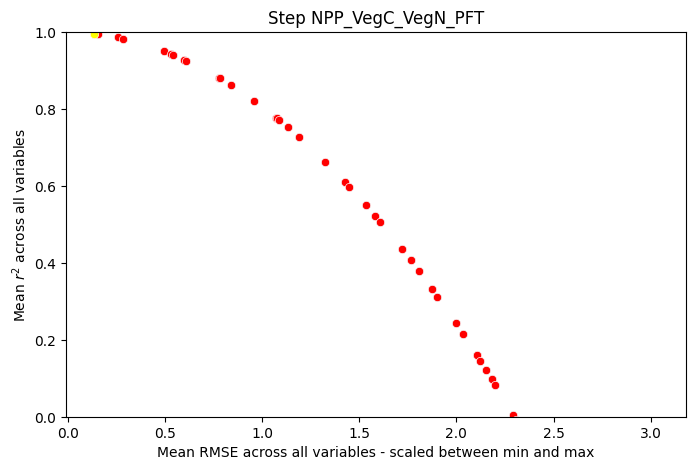

In [10]:
fig, ax = plt.subplots(figsize = (8,5))

sns.scatterplot(data = results, x='mean_rmse', y='mean_r2')
sns.scatterplot(data = results.iloc[top], x='mean_rmse', y='mean_r2', color='red')
sns.scatterplot(data = results.iloc[first], x='mean_rmse', y='mean_r2', color='yellow')

ax.title.set_text('Step {}'.format(STEP))
ax.set_ylabel('Mean $r^2$ across all variables')
ax.set_xlabel('Mean RMSE across all variables - scaled between min and max')
plt.ylim(0,1)
#plt.xlim(0,1)

In [11]:
results.columns

Index(['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5', 'VegCarbonLeaf1',
       'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonStem2',
       'VegCarbonRoot2', 'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
       'VegCarbonLeaf4', 'VegCarbonLeaf5', 'VegNitrogenLeaf1',
       'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2',
       'VegNitrogenStem2', 'VegNitrogenRoot2', 'VegNitrogenLeaf3',
       'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
       'VegNitrogenLeaf5', 'nmax', 'krb(0)', 'krb(1)', 'krb(2)', 'cfall(0)',
       'cfall(1)', 'cfall(2)', 'nfall(0)', 'nfall(1)', 'nfall(2)', 'r2',
       'rmse', 'rmse_scaled', 'overall_accuracy', 'mean_rmse', 'mean_r2'],
      dtype='object')

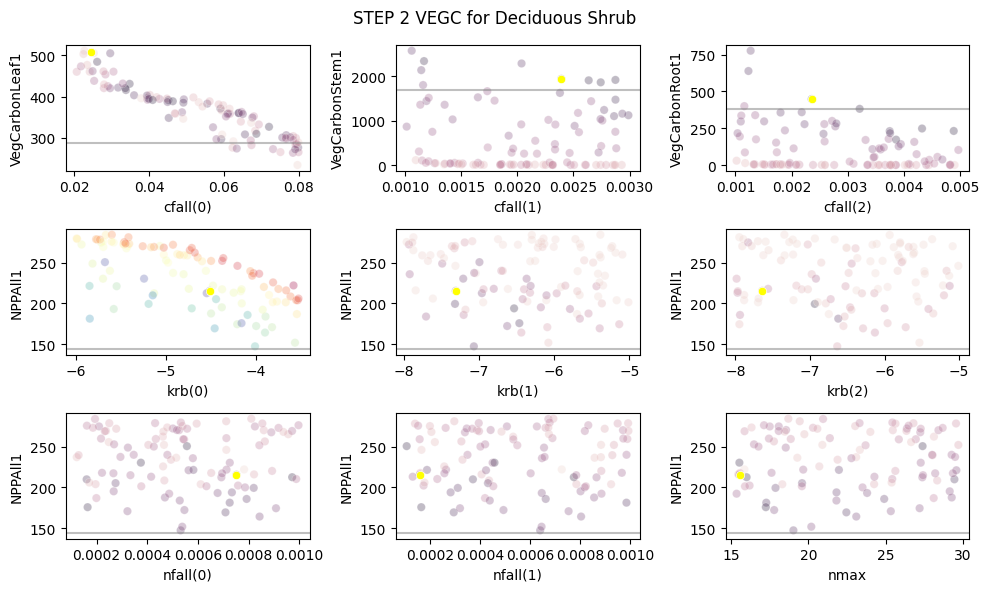

In [12]:
if STEP == 'NPP_VegC_PFT' or STEP=='NPP_VegC_VegN_PFT':
    pft=1
    fig, axes = plt.subplots(3,3, figsize = (10,6))
    fig.suptitle('STEP 2 VEGC for Deciduous Shrub')

    axes[0,0].axhline(targets[f'VegCarbonLeaf{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y=f'VegCarbonLeaf{pft}', ax=axes[0,0], alpha=0.3,legend=False, hue=f'nmax')
    #sns.scatterplot(data = results.iloc[top], x='cfall(0)', y=f'VegCarbonLeaf{pft}', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y=f'VegCarbonLeaf{pft}', ax=axes[0,0], color='yellow',legend=True)

    axes[0,1].axhline(targets[f'VegCarbonStem{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1)', y=f'VegCarbonStem{pft}', ax=axes[0,1], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(1)', y=f'VegCarbonStem{pft}', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1)', y=f'VegCarbonStem{pft}', ax=axes[0,1], color='yellow',legend=False)

    axes[0,2].axhline(targets[f'VegCarbonRoot{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2)', y=f'VegCarbonRoot{pft}', ax=axes[0,2], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(2)', y=f'VegCarbonRoot{pft}', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2)', y=f'VegCarbonRoot{pft}', ax=axes[0,2], color='yellow',legend=False)
    
    axes[1,0].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}', palette='Spectral')
    #sns.scatterplot(data = results.iloc[top], x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], color='yellow',legend=False)
    
    axes[1,1].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], alpha=0.3,legend=False, hue=f'VegCarbonStem{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], color='yellow',legend=False)
    
    axes[1,2].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], alpha=0.3,legend=False, hue=f'VegCarbonRoot{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], color='yellow',legend=False)
    
    axes[2,0].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0)', y=f'NPPAll{pft}', ax=axes[2,0], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(0)', y=f'NPPAll{pft}', ax=axes[2,0], color='yellow',legend=False)
    
    axes[2,1].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(1)', y=f'NPPAll{pft}', ax=axes[2,1], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(1)', y=f'NPPAll{pft}', ax=axes[2,1], color='yellow',legend=False)
    
    axes[2,2].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax', y=f'NPPAll{pft}', ax=axes[2,2], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax', y=f'NPPAll{pft}', ax=axes[2,2], color='yellow',legend=False)

    fig.tight_layout()

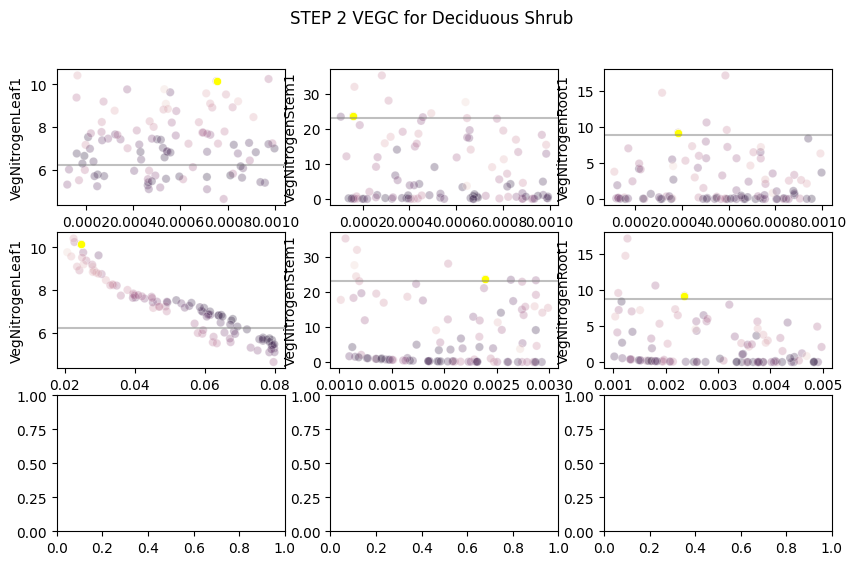

In [13]:
if 'NPP_VegC_VegN_PFT':
    pft=1
    fig, axes = plt.subplots(3,3, figsize = (10,6))
    fig.suptitle('STEP 2 VEGC for Deciduous Shrub')

    axes[0,0].axhline(targets[f'VegNitrogenLeaf{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], color='yellow',legend=False)

    axes[0,1].axhline(targets[f'VegNitrogenStem{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], color='yellow',legend=False)

    axes[0,2].axhline(targets[f'VegNitrogenRoot{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], color='yellow',legend=False)
    
    axes[1,0].axhline(targets[f'VegNitrogenLeaf{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[1,0], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[1,0], color='yellow',legend=False)

    axes[1,1].axhline(targets[f'VegNitrogenStem{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[1,1], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[1,1], color='yellow',legend=False)

    axes[1,2].axhline(targets[f'VegNitrogenRoot{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[1,2], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[1,2], color='yellow',legend=False)
    

In [14]:
targets[[f'VegCarbonLeaf{pft}', f'VegCarbonStem{pft}', f'VegCarbonRoot{pft}', f'NPPAll{pft}']]

VegCarbonLeaf1     287.19
VegCarbonStem1    1694.10
VegCarbonRoot1     383.38
NPPAll1            144.24
Name: 100, dtype: float64

In [15]:
pft

1

In [16]:
results.iloc[top][[f'VegCarbonLeaf{pft}', f'VegCarbonStem{pft}', f'VegCarbonRoot{pft}', f'NPPAll{pft}']].sort_values(by='VegCarbonStem1')
#results.iloc[top][[f'VegCarbonLeaf{pft}', f'NPPAll{pft}']]

,VegCarbonLeaf1,VegCarbonStem1,VegCarbonRoot1,NPPAll1
42,282.362500,1.548147,29.195330,265.059642
86,271.530203,1.632658,13.088577,255.415818
96,375.655237,255.217657,86.513548,249.913860
82,380.786395,255.877966,85.585329,268.992038
89,386.147110,271.000949,52.093765,252.680219
40,378.745395,278.072675,24.824359,274.514890
68,420.430566,282.382077,37.223330,151.952654
49,388.280109,350.243369,55.374141,270.176663
74,386.684830,368.506534,193.841769,214.922721
97,395.668588,376.793048,112.990747,192.301973


In [17]:
targets[[f'VegCarbonLeaf{pft}', f'VegCarbonStem{pft}', f'VegCarbonRoot{pft}', f'NPPAll{pft}']]
#targets[[f'VegCarbonLeaf{pft}', f'NPPAll{pft}']]

VegCarbonLeaf1     287.19
VegCarbonStem1    1694.10
VegCarbonRoot1     383.38
NPPAll1            144.24
Name: 100, dtype: float64

In [18]:
473.758054+1581.133142+282.691980

2337.583176

In [19]:
287+1694+383

2364

In [20]:
results.iloc[19][[f'VegCarbonLeaf{pft}', f'VegCarbonStem{pft}', f'VegCarbonRoot{pft}', f'NPPAll{pft}']]


VegCarbonLeaf1     511.354681
VegCarbonStem1    1860.656226
VegCarbonRoot1     231.215836
NPPAll1            212.495553
Name: 19, dtype: float64

In [21]:
results.iloc[19][calib_params_flat]

nmax        16.010259
krb(0)      -4.544574
krb(1)      -6.962351
krb(2)      -6.137253
cfall(0)     0.022745
cfall(1)     0.002743
cfall(2)     0.004894
nfall(0)     0.000972
nfall(1)     0.000775
nfall(2)     0.000217
Name: 19, dtype: float64

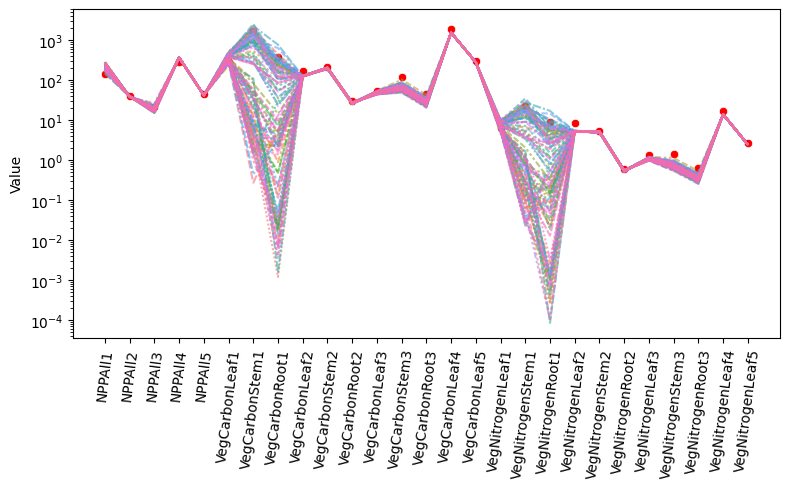

In [22]:
fig, ax=plt.subplots(figsize=(8,5))
sns.lineplot(results[target_vars].T, legend=False, alpha=0.6)
#sns.lineplot(results[target_vars].iloc[70].T, legend=False, alpha=0.6)
sns.scatterplot(targets.T, color='red')
plt.xticks(rotation=83)
plt.yscale('log')
plt.ylabel('Value')

fig.tight_layout()
plt.savefig('BONA_Black_Spruce_SA_ex.jpg', dpi=300)

In [23]:
#
#print(results[['VegVarbonStem1']] + results[['VegVarbonStem3']])

In [24]:
results[top]

KeyError: "None of [Int64Index([ 3, 41, 57, 65, 81, 69, 64, 28, 62, 39, 43, 88, 73, 48, 37, 18, 16,\n             9, 19, 45, 26, 22, 11, 74, 79, 20, 50, 14, 53, 76, 71, 82, 98, 55,\n            97, 80, 70, 51, 61, 96, 47, 35, 49, 89, 68, 42, 23, 40, 86, 60],\n           dtype='int64')] are in the [columns]"

In [ ]:
sns.lineplot(results[target_vars].T, legend=False, alpha=0.6)
sns.lineplot(results[target_vars].iloc[first].T, legend=False, alpha=0.6, color='red')
sns.scatterplot(targets.T, color='red')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel('Value')

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (10,6))

axes[0,0].axhline(targets['CarbonShallow'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='micbnup', y='CarbonShallow', ax=axes[0,0], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='micbnup', y='CarbonShallow', ax=axes[0,0], color='yellow',legend=False)

axes[0,1].axhline(targets['CarbonShallow'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcrawc', y='CarbonShallow', ax=axes[0,1], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcrawc', y='CarbonShallow', ax=axes[0,1], color='yellow',legend=False)

axes[0,2].axhline(targets['CarbonShallow'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsoma', y='CarbonShallow', ax=axes[0,2], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsoma', y='CarbonShallow', ax=axes[0,2], color='yellow',legend=False)


axes[1,0].axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='micbnup', y='CarbonDeep', ax=axes[1,0], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='micbnup', y='CarbonDeep', ax=axes[1,0], color='yellow',legend=False)

axes[1,1].axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcrawc', y='CarbonDeep', ax=axes[1,1], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcrawc', y='CarbonDeep', ax=axes[1,1], color='yellow',legend=False)

axes[1,2].axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsompr', y='CarbonDeep', ax=axes[1,2], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsompr', y='CarbonDeep', ax=axes[1,2], color='yellow',legend=False)

axes[2,0].axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='micbnup', y='CarbonMineralSum', ax=axes[2,0], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='micbnup', y='CarbonMineralSum', ax=axes[2,0], color='yellow',legend=False)

axes[2,1].axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsomcr', y='CarbonMineralSum', ax=axes[2,1], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsomcr', y='CarbonMineralSum', ax=axes[2,1], color='yellow',legend=False)

axes[2,2].axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsompr', y='CarbonMineralSum', ax=axes[2,2], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsompr', y='CarbonMineralSum', ax=axes[2,2], color='yellow',legend=False)

fig.tight_layout()

In [ ]:
sns.scatterplot(data = results, x='micbnup', y='AvailableNitrogenSum', alpha=0.3,legend=False)


In [ ]:
targets

In [ ]:
results.loc[(results['CarbonDeep']<9100) & (results['CarbonDeep']>8200)].sort_values(by='AvailableNitrogenSum')

In [ ]:
results.loc[(results['AvailableNitrogenSum']<1)].sort_values(by='AvailableNitrogenSum')

In [ ]:
results.iloc[45]

In [ ]:
if STEP == 'NPP_VegC_PFT':
    fig, ax=plt.subplots()
    ax.axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(2)', y='NPPAll3', ax=ax, alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(2)', y='NPPAll3', ax=ax, color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(2)', y='NPPAll3', ax=ax, color='yellow',legend=False)
    ax.title.set_text('EvrTree')

In [ ]:
palette = sns.color_palette("mako", as_cmap=True)

if STEP == 1:
    fig, axes = plt.subplots(2,3, figsize = (8,5))
    fig.suptitle('STEP 1 cmax vs GPP for each PFT')

    axes[0,0].axhline(targets['GPP1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax', y='GPP1', ax=axes[0,0], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax', y='GPP1', ax=axes[0,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax', y='GPP1', ax=axes[0,0], color='yellow', legend=False)
    axes[0,0].title.set_text(pfts[0])

    axes[0,1].axhline(targets['GPP2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.1', y='GPP2', ax=axes[0,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.1', y='GPP2', ax=axes[0,1], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.1', y='GPP2', ax=axes[0,1], color='yellow', legend=False)
    axes[0,1].title.set_text(pfts[1])

    axes[0,2].axhline(targets['GPP3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.2', y='GPP3', ax=axes[0,2], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.2', y='GPP3', ax=axes[0,2], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.2', y='GPP3', ax=axes[0,2], color='yellow', legend=False)
    axes[0,2].title.set_text(pfts[2])

    axes[1,0].axhline(targets['GPP4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.3', y='GPP4', ax=axes[1,0], alpha=0.05, palette=palette)
    sns.scatterplot(data = results.iloc[top], x='cmax.3', y='GPP4', ax=axes[1,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.3', y='GPP4', ax=axes[1,0], color='yellow', legend=False)
    axes[1,0].title.set_text(pfts[3])

    axes[1,1].axhline(targets['GPP5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.4', y='GPP5', ax=axes[1,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.4', y='GPP5', ax=axes[1,1], color='red', label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='cmax.4', y='GPP5', ax=axes[1,1], color='yellow', label='Top run')
    axes[1,1].title.set_text(pfts[4])

    #axes[1,1].legend(loc='lower right', bbox_to_anchor=(1,0), title='Overall Accuracy')
   
    fig.tight_layout()


In [ ]:
results.iloc[first]